In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise: Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a pandas DataFrame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in pandas help you find the number of observations and mean of observations in a DataFrame.

In [2]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [3]:
import random
from scipy.cluster.vq import kmeans, vq

random.seed(1)

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_pac', 'scaled_pac', 'scaled_sho']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_pac', 'scaled_sho']], cluster_centers)

In [4]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    219
1    439
2    342
Name: ID, dtype: int64
cluster_labels
0    61292.237443
1    74100.227790
2    68652.046784
Name: eur_wage, dtype: float64


You are correct! In this example, the cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

### Exercise: FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

Here is a sample card:

Eden Hazard Player Card

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a pandas DataFrame, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features in the IPython Shell to check out the list of six scaled columns names.

In [5]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [6]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.461627    3.673869    7.180554    6.775813    3.966748   
1                 6.684477    5.433653    8.456695    8.516572    2.496427   

                scaled_phy  
cluster_labels              
0                 9.206925  
1                 8.332794  


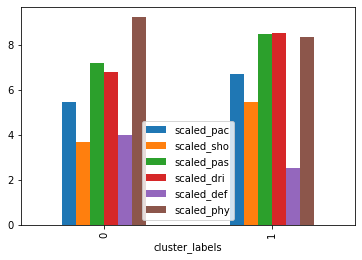

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [7]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

That is correct! The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.